In [1]:
%load_ext autoreload
%autoreload 2

import pickle 

def to_pickle(df, f):
    with open(f, 'wb') as fname:
        pickle.dump(df, fname)

def open_pickle(f):
    with open(f, 'rb') as file:
        data = pickle.load(file)
    return data  

## Explore AFR dataset

In [2]:
import pandas as pd 

#answer_df = pd.read_csv("medqa_ft_results.csv")
answer_df = pd.read_csv("afr_ft_results.csv", sep='\t')

In [38]:
answer_df['ft_str'] = answer_df['ft'].str.split('Answer:', expand=True)[1].str.split('.', expand=True)[0]

In [40]:
recover_df = answer_df.loc[answer_df['ft_str'].isna()]

In [41]:
answer_df = answer_df.dropna()

In [45]:
recover_df['ft_str'] = recover_df['ft'].str.split('Response:', expand=True)[1].str.split('.', expand=True)[0]

/tmp/ipykernel_384984/1281530581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recover_df['ft_str'] = recover_df['ft'].str.split('Response:', expand=True)[1].str.split('.', expand=True)[0]


In [46]:
recover_df

ft  \
559  Below is an instruction that describes a task,...   

                                  gt         ft_str  
559  ###Answer: OPTION C IS CORRECT.   C IS CORRECT

In [48]:
answer_df = pd.concat([answer_df, recover_df])

In [55]:
answer_df['ft'] = answer_df['ft_str'].str.replace('OPTION', '').str.replace('IS', '').str.replace('CORRECT', '').str.strip()

In [59]:
recover_df = answer_df.loc[~answer_df['ft'].isin(['A', 'B', 'C', 'D', 'E'])]

In [60]:
answer_df = answer_df.loc[answer_df['ft'].isin(['A', 'B', 'C', 'D', 'E'])]

In [62]:
recover_df['ft'] = recover_df['ft'].str.slice(0, 1).tolist()

/tmp/ipykernel_384984/2685307825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recover_df['ft'] = recover_df['ft'].str.slice(0, 1).tolist()


In [63]:
answer_df = pd.concat([answer_df, recover_df])

In [65]:
answer_df = answer_df.loc[answer_df['ft'].isin(['A', 'B', 'C', 'D', 'E'])]

In [71]:
answer_df['gt'] = answer_df['gt'].str.split(': OPTION', expand=True)[1].str.strip().str.slice(0, 1).tolist()

In [72]:
result_list = []
for i in range(0, 100):
    df = answer_df.sample(frac=1, replace=True)
    p_correct = df.loc[df['ft'] == df['gt']].shape[0] / len(df)
    print(p_correct)
    result_list.append(p_correct)

0.6418592154755508
0.645889306824288
0.6356797420741537
0.6421278882321333
0.6552928533046749
0.6598602901665771
0.6399785061794734
0.6356797420741537
0.6574422353573348
0.6587855991402471
0.6515314347125202
0.6437399247716281
0.6480386888769479
0.6367544331004836
0.6434712520150456
0.6372917786136486
0.6410531972058033
0.6432025792584632
0.6370231058570661
0.6383664696399785
0.6418592154755508
0.6499193981730252
0.6295002686727565
0.631380977968834
0.6410531972058033
0.6418592154755508
0.6566362170875873
0.6332616872649114
0.6252015045674368
0.6407845244492208
0.6356797420741537
0.6324556689951639
0.6370231058570661
0.6305749596990865
0.6442772702847931
0.645889306824288
0.6415905427189683
0.6418592154755508
0.6472326706072005
0.6370231058570661
0.6563675443310049
0.6496507254164428
0.6364857603439011
0.646426652337453
0.6426652337452983
0.6292315959161741
0.6558301988178399
0.6442772702847931
0.6423965609887158
0.6399785061794734
0.6405158516926384
0.6410531972058033
0.64239656098871

In [73]:
plot_df = pd.DataFrame(result_list)
plot_df.columns = ['p']
plot_df['model'] = 'ft'

In [75]:
plot_df['p'].mean()

0.6426222461042451

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(3,4))
sns.barplot(data=plot_df, x='model', y='p', errorbar='sd')
plt.ylim(0, 1)

(0.0, 1.0)

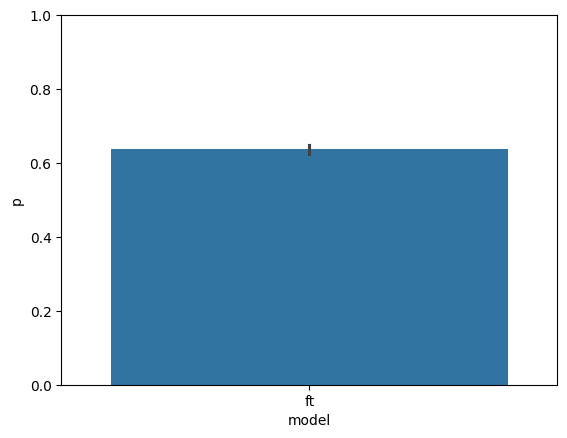

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.barplot(data=plot_df, x='model', y='p', errorbar='sd')
plt.ylim(0, 1)

In [2]:
#
# Set up vocabulary and tokenizer
#
import pandas as pd 
from transformers import LlamaConfig
import torch 
import transformers
from transformers import AutoTokenizer, AutoModelForCausalLM

from custom_model_mlp import CustomModel
#from custom_model import CustomModel

cui_embeds = open_pickle("/n/home01/ruthjohnson/kg_paper_revision/model/umls_cui_embeds.pkl")
node_df = pd.read_csv("/n/home01/ruthjohnson/kg_paper_revision/connected_node_v2_df.csv", sep='\t')
keep_cui = set(node_df.loc[node_df['ntype'] == 'UMLS_CUI']['node_id'].str.split(':', expand=True)[0].tolist())
keep_cui = list(keep_cui)


In [3]:
import pandas as pd
data_list = open_pickle("afr_processed_test.pkl")
df = pd.read_csv("results_afr_df.csv")

In [4]:
filter_df = df.loc[df['ft'].isin(['A', 'B', 'C', 'D', 'E']) & 
        df['basic'].isin(['A', 'B', 'C', 'D', 'E'])]

In [5]:
filter_df.loc[filter_df['ft'] == filter_df['gt']].shape[0] / len(filter_df)

0.6429475015812777

In [6]:
filter_df.loc[filter_df['basic'] == filter_df['gt']].shape[0] / len(filter_df)

0.59044908285895

In [49]:
from datasets import load_dataset
import pandas as pd

afrimedqa = load_dataset("intronhealth/afrimedqa_v2")
all_qa_df = pd.DataFrame(afrimedqa['train'])
qa_df = all_qa_df.loc[all_qa_df['question_type'] == 'mcq'][['question_clean', 
                                              'answer_options', 
                                              'correct_answer',
                                              'discipline',
                                             'clinical_experience',
                                             	'question_type',
                                                'specialty',
                                                'tier',
                                                'answer_rationale']]
qa_df = qa_df.loc[~qa_df['correct_answer'].str.contains(',')]

In [41]:
list_data_dict = open_pickle("afr_list_data_dict.pkl")

In [45]:
qa_df = qa_df.reset_index()

In [56]:
instruct_str="You're a English doctor, kindly address the medical queries according to the patient's account in English. Let’s solve this step-by-step.  You should first give the reason in English for your choice. Then you should give the right answer index of the question."

new_data_list = []
for i in range(0, len(list_data_dict)):
    x = list_data_dict[i]
    row = qa_df.iloc[i]
    rationale = row['answer_rationale']
    x['instruction'] = instruct_str
    x['rationale'] = rationale 
    new_data_list.append(x)

In [ ]:
input_str="###Question: {}".format(input)
rationale_str="{}".format(rationale)

In [72]:
all_qa_df['discipline'].unique()

array(['Non-Health', None, 'Other Health Professions', 'Medicine',
       'Pharmacy', 'Health Research', 'Nursing', 'Laboratory Sciences'],
      dtype=object)

In [8]:
qa_df = qa_df.reset_index()
result_df = pd.concat([df, qa_df], axis=1)

In [10]:
result_df['correct'] = 0
result_df.loc[result_df['ft'] == result_df['gt'], 'correct'] = 1

In [11]:
result_df.groupby('tier')['correct'].sum()/result_df.groupby('tier')['correct'].count()

tier
crowdsourced    0.7500
expert          0.6425
Name: correct, dtype: float64

In [12]:
result_df.groupby('clinical_experience')['correct'].sum()/result_df.groupby('clinical_experience')['correct'].count()

clinical_experience
Intern                   0.633122
Licensed Professional    0.654617
Other                    0.333333
Student                  0.644769
Technician               1.000000
Name: correct, dtype: float64

In [13]:
result_df.groupby('specialty')['correct'].sum()/result_df.groupby('specialty')['correct'].count()

specialty
Allergy_and_Immunology                  0.800000
Anesthesiology                          0.500000
Cardiology                              0.725714
Dermatology                             0.611111
Emergency_Medicine                      0.592593
Endocrinology                           0.671429
Family_Medicine                         0.500000
Gastroenterology                        0.738806
General_Surgery                         0.664659
Geriatrics                              1.000000
Hematology                              0.565217
Infectious_Disease                      0.638498
Internal_Medicine                       0.779412
Medical_Genetics                        1.000000
Nephrology                              0.740741
Neurology                               0.658986
Neurosurgery                            0.656250
Obstetrics_and_Gynecology               0.575318
Oncology                                0.714286
Ophthalmology                           0.754717
Orthopedic

In [14]:
result_df.groupby('specialty')['correct'].count()

specialty
Allergy_and_Immunology                    5
Anesthesiology                           12
Cardiology                              175
Dermatology                              36
Emergency_Medicine                       27
Endocrinology                           140
Family_Medicine                           8
Gastroenterology                        134
General_Surgery                         498
Geriatrics                                3
Hematology                               69
Infectious_Disease                      213
Internal_Medicine                        68
Medical_Genetics                          1
Nephrology                               81
Neurology                               217
Neurosurgery                             32
Obstetrics_and_Gynecology               551
Oncology                                 42
Ophthalmology                           106
Orthopedic_Surgery                       56
Other                                    34
Otolaryngology        

In [69]:
for x in qa_df['clinical_experience'].unique():
    subset_df = result_df.loc[result_df['clinical_experience'] == x]
    subset_df = subset_df.loc[subset_df['basic'].isin(['A', 'B', 'C', 'D', 'E'])]
    try:
        p = subset_df.loc[subset_df['ft'] == subset_df['gt']].shape[0] / len(subset_df)
    except:
        p = 0
    print(p, len(subset_df))

0.6509779951100244 1636
0.6445623342175066 377
0.3333333333333333 3
0 0
0.6306620209059234 1148


In [70]:
for x in qa_df['clinical_experience'].unique():
    subset_df = result_df.loc[result_df['clinical_experience'] == x]
    subset_df = subset_df.loc[subset_df['basic'].isin(['A', 'B', 'C', 'D', 'E'])]
    try:
        p = subset_df.loc[subset_df['basic'] == subset_df['gt']].shape[0] / len(subset_df)
    except:
        p = 0
    print(p, len(subset_df))

0.6106356968215159 1636
0.5702917771883289 377
0.3333333333333333 3
0 0
0.5696864111498258 1148


In [12]:
data_list = open_pickle("afr_processed_test.pkl")

In [13]:
cui_lists = []
for x in data_list:
    s = x['input'].split('<')
    if len(s) > 0:
        l = [t.strip(' ').strip('>') for t in s[1:] if ((t[0]=='C'))]
    else:
        l = []
    cui_lists.append(l)


In [14]:
question_len_list = []
for x in data_list:
    s = len(x['input'].split('<')[0])
    question_len_list.append(s)

In [15]:
df['question_len'] = question_len_list
df['cui_list'] = cui_lists
df['n_cui'] = df['cui_list'].apply(lambda x: len(x))

NameError: name 'df' is not defined

In [82]:
filter_df = df.loc[df['basic'].isin(['A', 'B', 'C', 'D'])]
recover_df = df.loc[~df['basic'].isin(['A', 'B', 'C', 'D'])]
recover_df['basic'] = recover_df['basic'].str.split('.', expand=True)[0]
recover_df = recover_df.loc[recover_df['basic'].isin(['A', 'B', 'C', 'D'])]
answer_df = pd.concat([filter_df, recover_df])

/tmp/ipykernel_1501944/3907374916.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recover_df['basic'] = recover_df['basic'].str.split('.', expand=True)[0]


In [16]:
from collections import Counter
import itertools 
import pandas as pd

all_cui_list = list(itertools.chain.from_iterable(cui_lists)) 
count_dict = Counter(all_cui_list)
count_df = pd.DataFrame.from_dict(count_dict, orient='index').reset_index()

In [17]:
count_df.sort_values(by=0, ascending=False).head(20)

index    0
80   C0011900  333
121  C0087111  130
68   C0013227  115
122  C1533734  110
165  C2745965  100
32   C0012634   97
172  C0543467   85
14   C0015967   82
112  C0030193   77
11   C1457887   66
63   C0009566   61
235  C0000726   56
170  C0018787   55
13   C0022885   50
101  C1254351   45
161  C0010200   45
8    C0013404   42
217  C0037088   38
75   C0019693   38
180  C0039082   38

In [86]:
singles_list = count_df.loc[count_df[0] <= 1]['index'].tolist()

In [87]:
count_df['freq'] = count_df[0]/len(data_list)

In [88]:
freq_dict = {}
for i, row in count_df.iterrows():
    k = row['index']
    v = row['freq']
    freq_dict[k] = v

In [246]:
answer_df['singles_count'] = answer_df['cui_list'].apply(lambda x: (len(set(x) & set(singles_list))>0)).astype(int)

In [275]:
import numpy as np 
answer_df['avg_freq'] = answer_df['cui_list'].apply(lambda x: np.max([np.log(1/(freq_dict[c])) for c in x]))

In [25]:
cui_counts = []
for x in data_list:
    n = len(x['input'].split('<')) - 1
    cui_counts.append(n)

In [ ]:
import itertools 

all_cui_list = list(itertools.chain.from_iterable(cui_lists)) 


In [227]:
answer_df = answer_df.loc[answer_df['n_cui'] > 0 ]

In [89]:
answer_df

ft basic gt  question_len  \
0     D     D  D           367   
1     B     B  B           299   
2     B     B  B           299   
4     C     C  C           989   
5     D     D  D           163   
...  ..   ... ..           ...   
3697  B     B  B           487   
3699  B     B  B           409   
3706  B     B  B           306   
3714  B     B  B           291   
3717  B     B  B           232   

                                               cui_list  n_cui  
0              [C0040132, C0018021, C3159206, C0027530]      4  
1                                  [C0009450, C0027740]      2  
2                                            [C0019104]      1  
4     [C0231218, C1457887, C0040034, C0022885, C0015...     22  
5                        [C0012634, C1879316, C0005841]      3  
...                                                 ...    ...  
3697           [C3543842, C0015967, C0036572, C0234535]      4  
3699                     [C0011991, C2129214, C0020885]      3  
3706                               [C0010201, C0041290]      2  
3714                                         [C0042029]      1  
3717                                         [C0021167]      1  

[2991 rows x 6 columns]

In [92]:
answer_df = answer_df.loc[answer_df['n_cui'] > 0]

In [93]:
x = answer_df.loc[(answer_df['ft'] == answer_df['gt']) & (answer_df['basic'] != answer_df['gt'])]['n_cui'].mean()
print(x)

x = answer_df.loc[(answer_df['ft'] != answer_df['gt']) & (answer_df['basic'] == answer_df['gt'])]['n_cui'].mean()
print(x)

3.040201005025126
2.383177570093458


In [94]:
x = answer_df.loc[(answer_df['ft'] == answer_df['gt'])]['n_cui'].mean()
print(x)

x = answer_df.loc[(answer_df['ft'] != answer_df['gt'])]['n_cui'].mean()
print(x)

2.8401615695326026
2.6528822055137846


In [266]:
x = answer_df.loc[(answer_df['ft'] == answer_df['gt']) & (answer_df['basic'] != answer_df['gt'])]['singles_count'].mean()
print(x)

x = answer_df.loc[(answer_df['ft'] != answer_df['gt']) & (answer_df['basic'] == answer_df['gt'])]['singles_count'].mean()
print(x)

0.3741496598639456
0.2948717948717949


In [282]:
x = answer_df.loc[(answer_df['ft'] == answer_df['gt'])]['singles_count'].mean()
print(x)

x = answer_df.loc[(answer_df['ft'] != answer_df['gt'])]['singles_count'].mean()
print(x)

0.39094650205761317
0.3485576923076923


In [280]:
x = answer_df.loc[(answer_df['ft'] == answer_df['gt']) & (answer_df['basic'] != answer_df['gt'])]['singles_count'].mean()
print(x)

x = answer_df.loc[(answer_df['ft'] != answer_df['gt']) & (answer_df['basic'] != answer_df['gt'])]['singles_count'].mean()
print(x)

0.3741496598639456
0.3609467455621302


In [237]:
x = answer_df.loc[(answer_df['ft'] == answer_df['gt']) & (answer_df['basic'] != answer_df['gt'])]['question_len'].mean()
print(x)

x = answer_df.loc[(answer_df['ft'] != answer_df['gt']) & (answer_df['basic'] == answer_df['gt'])]['question_len'].mean()
print(x)

953.7755102040817
967.4230769230769


In [238]:
x = answer_df.loc[(answer_df['ft'] == answer_df['gt']) & (answer_df['basic'] != answer_df['gt'])]['question_len'].mean()
print(x)

x = answer_df.loc[(answer_df['ft'] != answer_df['gt']) & (answer_df['basic'] != answer_df['gt'])]['question_len'].mean()
print(x)

953.7755102040817
963.3994082840237


In [188]:
x = answer_df.loc[(answer_df['ft'] == answer_df['gt']) & 
                             (answer_df['basic'] != answer_df['gt'])]['cui_list'].values

count_dict = Counter(itertools.chain.from_iterable(x))

len([x for x in list(count_dict.values()) if x <=1]) / len(count_dict.values())

0.6442953020134228

In [187]:
x = answer_df.loc[(answer_df['ft'] != answer_df['gt']) & 
                             (answer_df['basic'] != answer_df['gt'])]['cui_list'].values

count_dict = Counter(itertools.chain.from_iterable(x))

len([x for x in list(count_dict.values()) if x <=2]) / len(count_dict.values())

0.7019498607242339

<Axes: ylabel='Count'>

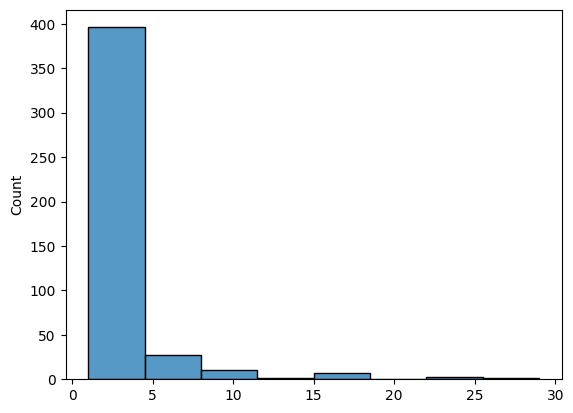

In [160]:
sns.histplot(x=list(count_dict.values()), bins=8) 

In [183]:
answer_df.loc[(answer_df['ft'] != answer_df['gt']) & 
                             (answer_df['basic'] != answer_df['gt'])]['question_len'].mean()

962.1608187134503

In [184]:
answer_df.loc[(answer_df['ft'] == answer_df['gt']) & 
                             (answer_df['basic'] != answer_df['gt'])]['question_len'].mean()

947.0733333333334

<Axes: ylabel='Count'>

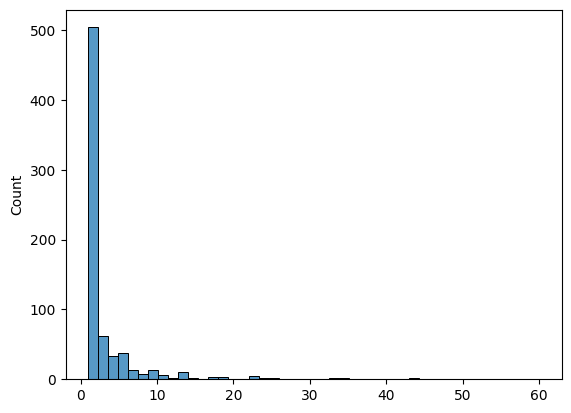

In [154]:
sns.histplot(x=list(count_dict.values()), bins=45) 

In [185]:
len(answer_df.loc[(answer_df['ft'] == answer_df['gt']) & 
                             (answer_df['basic'] != answer_df['gt'])])

150

In [186]:
len(answer_df.loc[(answer_df['ft'] != answer_df['gt']) & 
                             (answer_df['basic'] != answer_df['gt'])])

342

In [138]:
answer_df.loc[(answer_df['ft'] == answer_df['gt']) & 
                             (answer_df['basic'] != answer_df['gt'])]['n_cui'].mean()

7.233333333333333

In [ ]:
answer_df.loc[(answer_df['ft'] != answer_df['gt']) & 
                             (answer_df['basic'] != answer_df['gt'])]['n_cui'].mean()

6.0

In [130]:
answer_df.loc[(answer_df['ft'] == answer_df['gt'])]['n_cui'].mean()

7.042553191489362

In [131]:
answer_df.loc[(answer_df['ft'] != answer_df['gt'])]['n_cui'].mean()

7.24228028503563

In [132]:
answer_df.loc[(answer_df['ft'] != answer_df['gt']) & 
                             (answer_df['basic'] == answer_df['gt'])].query("n_cui > 0")['n_cui'].mean()

7.589743589743589

In [115]:
remove_list = ['C1457887', 'C0011900', 'C0030193', 'C0018787', 'C0015967', 'C0000726', 'C4037974', 'C0013404', 'C0024109', 'C0015672']

In [96]:
node_df.loc[node_df['node_id'] == "C0681827:umls_cui"]

node_id           node_name     ntype  node_index
78008  C0681827:umls_cui  Laboratory studies  UMLS_CUI       78008

7.26

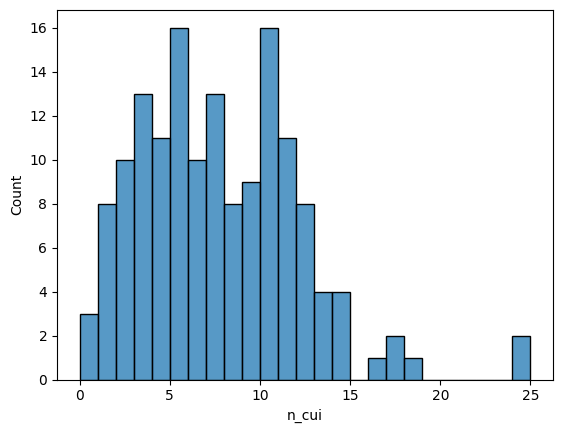

In [83]:
import seaborn as sns

sns.histplot(x=answer_df.loc[(answer_df['ft'] == answer_df['gt']) & 
                             (answer_df['basic'] != answer_df['gt'])]['n_cui'], bins=25)
answer_df.loc[(answer_df['ft'] == answer_df['gt']) & 
                             (answer_df['basic'] != answer_df['gt'])]['n_cui'].mean()

7.493670886075949

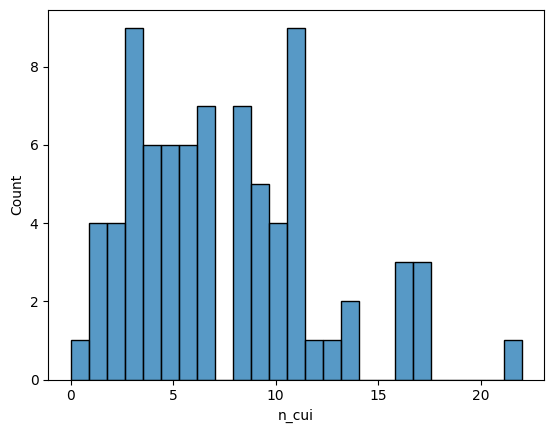

In [84]:
sns.histplot(x=answer_df.loc[(answer_df['ft'] != answer_df['gt']) & 
                             (answer_df['basic'] == answer_df['gt'])]['n_cui'], bins=25)
answer_df.loc[(answer_df['ft'] != answer_df['gt']) & 
                             (answer_df['basic'] == answer_df['gt'])]['n_cui'].mean()

In [4]:
old_train_list = open_pickle("new_list_data_dict.pkl")

In [5]:
new_train_list = open_pickle("annot_train_medqa_orig.pkl") 

In [6]:
print(len(old_train_list))
print(len(new_train_list))

20356
10179


In [26]:
import re
input_string = new_train_list[-1]['input']
tokens = re.findall(r'<(C[^>]*)>', input_string)
tokens 

['C0232495',
 'C2979982',
 'C0087111',
 'C0200045',
 'C0221423',
 'C0000832',
 'C0015672',
 'C0334529',
 'C0042149',
 'C3825064',
 'C0008497',
 'C2745965',
 'C0027497',
 'C1533734',
 'C4266525']

In [10]:
[x for x in old_train_list if x['input'].startswith("###Question: A 12-year-old girl is brought to the emergency department by her parents")]

[{'instruction': "You're a English doctor, kindly address the medical queries according to the patient's account. Answer with the best option directly.",
  'input': '###Question: A 12-year-old girl is brought to the emergency department by her parents due to severe shortness of breath that started 20 minutes ago. She has a history of asthma and her current treatment regime includes a beta-agonist inhaler as well as a medium-dose corticosteroid inhaler. Her mother tells the physician that her daughter was playing outside with her friends when she suddenly started experiencing difficulty breathing and used her inhaler without improvement. On examination, she is struggling to breathe and with subcostal and intercostal retractions. She is leaning forward, and gasping for air and refuses to lie down on the examination table. Her blood pressure is 130/92 mm Hg, the respirations are 27/min, the pulse is 110/min and O2 saturation is 87%. There is prominent expiratory wheezes in all lung fields

In [56]:
from train_mlp_model import jsonl_load 

og_data_list = jsonl_load("/n/home01/ruthjohnson/ruthjohnson/kg_paper_revision/medqa/MMedBench/Train_eng")
len(og_data_list)

20356

In [57]:
from inference import read_jsonl
train_medqa_list = read_jsonl("/n/home01/ruthjohnson/ruthjohnson/kg_paper_revision/medqa/MMedBench/Train/English.jsonl",
                            is_with_rationale=False)
len(train_medqa_list)

False


10178

In [75]:
tokens_train_medqa_orig = open_pickle("tokens_train_medqa_orig.pkl")
tokens_train_medqa_orig = (tokens_train_medqa_orig[0:7500] + tokens_train_medqa_orig[7501:])

In [76]:
len(tokens_train_medqa_orig)

10178

In [77]:
double_cui_tokens = []
for x in tokens_train_medqa_orig:
    double_cui_tokens.append(x)
    double_cui_tokens.append(x)
len(double_cui_tokens)


20356

In [ ]:
for i in range(0, len(og_data_list)):
    input_dict = og_data_list[i]
    cui_tokens = double_cui_tokens[i]
    input_string = input_dict['input']
    token_string = " ".join([f"<{token}>" for token in cui_tokens])
    new_input_string = input_string + ' ' + token_string
    og_data_list[i]['input'] = new_input_string
shuffle(og_data_list)

In [86]:
og_data_list[9002]['input']

"###Question: A 43-year-old male with a history of thyroid cancer status post total thyroidectomy presents to his primary care physician after repeated bouts of headaches. His headaches are preceded by periods of anxiety, palpitations, and sweating. The patient says he is unable to pinpoint any precipitating factors and instead says the events occur without warning. Of note, the patient's father and uncle also have a history of thyroid cancer. On exam his vitals are: T 36.8 HR 87, BP 135/93, RR 14, and O2 Sat 100% on room air. The patient's TSH is within normal limits, and he reports taking his levothyroxine as prescribed. What is the next best step in diagnosing this patient's chief complaint? Which of the following is the best treatment for this patient? ###Options: A. Abdominal CT scan with and without IV contrast B. 24-hour urine free cortisol C. High dose dexamethasone suppression test D. Plasma fractionated metanephrines  <C0025562> <C0549473> <C0430115> <C0087111> <C0193788> <C3

In [81]:
og_data_list[1]

{'instruction': "You're a English doctor, kindly address the medical queries according to the patient's account. Answer with the best option directly.",
 'input': '###Question: A 23-year-old pregnant woman at 22 weeks gestation presents with burning upon urination. She states it started 1 day ago and has been worsening despite drinking more water and taking cranberry extract. She otherwise feels well and is followed by a doctor for her pregnancy. Her temperature is 97.7°F (36.5°C), blood pressure is 122/77 mmHg, pulse is 80/min, respirations are 19/min, and oxygen saturation is 98% on room air. Physical exam is notable for an absence of costovertebral angle tenderness and a gravid uterus. Which of the following is the best treatment for this patient? Which of the following is the best treatment for this patient? ###Options: A. Ampicillin B. Ceftriaxone C. Doxycycline D. Nitrofurantoin  <C0235634> <C0043047> <C3536832> <C0087111> <C0453273> <C0013090> <C0002680> <C1533734> <C0028156> <C

In [73]:
annot_train_medqa_list = open_pickle("annot_train_medqa_orig.pkl")
annot_train_medqa_list = (annot_train_medqa_list[0:7500] + annot_train_medqa_list[7501:])

In [74]:
for x, y in zip(train_medqa_list, annot_train_medqa_list):
    if x['input'][0:50] != x['input'][0:50]:
        print(x, y)

In [ ]:
len([x for x tokens_train_medqa_orig])

1

In [51]:
len(tokens_train_medqa_orig)

10179

In [53]:
len(og_data_list)

20356

In [32]:
og_data_list[0]['input'] += " ".join([f"<{token}>" for token in tokens_train_medqa_orig[0]])


In [40]:
og_data_list[0 + 10177]

{'instruction': "You're a English doctor, kindly address the medical queries according to the patient's account. Answer with the best option directly.",
 'input': '###Question: A 19-year-old collegiate football player sustains an injury to his left knee during a game. He was running with the ball when he dodged a defensive player and fell, twisting his left knee. He felt a “pop” as he fell. When he attempts to bear weight on his left knee, it feels unstable, and "gives way." He needs assistance to walk off the field. The pain is localized diffusely over the knee and is non-radiating. His past medical history is notable for asthma. He uses an albuterol inhaler as needed. He does not smoke or drink alcohol. On exam, he has a notable suprapatellar effusion. Range of motion is limited in the extremes of flexion. When the proximal tibia is pulled anteriorly while the knee is flexed and the patient is supine, there is 1.5 centimeter of anterior translation. The contralateral knee translates 

In [39]:
og_data_list[0]

{'instruction': "You're a English doctor, kindly address the medical queries according to the patient's account. Answer with the best option directly.",
 'input': '###Question: A patient is hospitalized for pneumonia. Gram-positive cocci in clusters are seen on sputum gram stain. Which of the following clinical scenarios is most commonly associated with this form of pneumonia? Which of the following is the best treatment for this patient? ###Options: A. HIV positive adult with a CD4 count less than 150 and an impaired diffusion capacity B. An otherwise healthy young adult with a week of mild fatigue, chills, and cough C. Hospitalized adult with development of pneumonia symptoms 2 weeks following a viral illness D. An alcoholic with evidence of empyema and "currant jelly sputum" C0235634 C0043047 C3536832 C0087111 C0453273 C0013090 C0002680 C1533734 C0028156 C0007561 C0030054<C0235634> <C0043047> <C3536832> <C0087111> <C0453273> <C0013090> <C0002680> <C1533734> <C0028156> <C0007561> <C0

In [37]:
len(og_data_list)/2.

10178.0

## Test original (non-FT) model

In [2]:
from peft import AutoPeftModelForCausalLM
from transformers import AutoTokenizer 
import torch

In [3]:
tokenizer = AutoTokenizer.from_pretrained(
    "/n/holylfs06/LABS/mzitnik_lab/Lab/ruthjohnson/kg_paper_revision/medqa/ft_basic",
    model_max_length=2048,
    use_fast=False,
    trust_remote_code=True
)
tokenizer.pad_token = tokenizer.eos_token

with torch.no_grad():
    model = AutoPeftModelForCausalLM.from_pretrained("/n/holylfs06/LABS/mzitnik_lab/Lab/ruthjohnson/kg_paper_revision/medqa/ft_basic") 
    model.cuda()

Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`
The new lm_head weights will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`
/n/home01/ruthjohnson/.local/lib/python3.10/site-packages/peft/peft_model.py:599: UserWarning: Found missing adapter keys while loading the checkpoint: ['base_model.model.model.layers.0.self_attn.q_proj.lora_A.default.weight', 'base_model.model.model.layers.0.self_attn.q_proj.lora_B.default.weight', 'base_model.model.model.layers.0.self_attn.v_proj.lora_A.default.weight', 'base_model.model.model.layers.0.self_attn.v_proj.lora_B.default.weight', 'base_model.model.model.layers.1.self_

In [4]:
from inference import inference 

filepath="/n/home01/ruthjohnson/ruthjohnson/kg_paper_revision/medqa/MMedBench/Test/English.jsonl"
model.cuda()

with torch.no_grad():
    inference(filepath, model, tokenizer, "ft_basic", False, n=10, outfname="ft_basic")

False


  0%|          | 0/1273 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention m

In [19]:
suffix = 'ft_basic'
result_filepath = "/n/holylfs06/LABS/mzitnik_lab/Lab/ruthjohnson/kg_paper_revision/medqa/results/{}.txt".format(suffix)
n_miss = 0

basic_list = []

with open(result_filepath, "r", encoding="utf-8") as f:
    lines = f.readlines()
    total_cnt = len(lines)
    right_cnt = 0
    error_cnt = 0
    for line in lines:
        line = line.strip()
        response, gt_answer = line.split("[SPLIT]")[0], line.split("[SPLIT]")[1]
        response = response.split('.')[0][0]

        #response = response.lower()
        #response = response.split("###answer: option ")[1].split('###')[0][0:1].upper()
        #response = response.split('.')[0][0]

        if len(gt_answer) == 1:
            if response == gt_answer:
                right_cnt += 1
        else:
            gt_answer = gt_answer.split(",")
            response = response.split(",")
            if set(response) == set(gt_answer):
                right_cnt += 1
        print(response, gt_answer)
        basic_list.append([response, gt_answer])

    #print("{}\t{}\t{}\t{:.2f}".format(filepath, right_cnt, total_cnt, right_cnt / total_cnt * 100))

A B
B D
B B
B D
B B
B D
B C
B C
B B
B A
D D
D D
B B
A D
D C
B B
T D
D D
A B
B D
C C
A A
C C
A D
A A
D D
A D
A A
D D
C C
D D
A C
B D
D B
B A
A A
C D
A A
A D
A A
C C
C C
A A
D B
C A
A D
A C
A A
B B
C C
A D
B A
T D
C C
A A
A A
A C
T B
C C
C A
T C
C A
B D
A A
C A
T B
C C
B B
B D
B A
A A
A A
A C
B B
A C
D A
B B
B B
C C
C C
B B
A A
D C
A A
C C
B B
C C
C C
B C
B B
D D
B B
C C
C D
C C
A D
A A
B B
B B
B B


In [20]:
right_cnt / total_cnt * 100

56.00000000000001

## Test Custom Model

In [3]:
from custom_model_mlp import CustomModel
from transformers import LlamaConfig
import pandas as pd 

cui_embeds = open_pickle("/n/holylfs06/LABS/mzitnik_lab/Lab/ruthjohnson/kg_paper_revision/final_embeddings/gnn_embeds_small_ntype_full_neighbor_cui.pkl")
node_df = pd.read_csv("/n/home01/ruthjohnson/kg_paper_revision/connected_node_v3_df.csv", sep='\t')
keep_cui = set(node_df.loc[node_df['ntype'] == 'UMLS_CUI']['node_id'].str.split(':', expand=True)[0].tolist())
keep_cui = list(keep_cui)

In [4]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(
    "/n/holylfs06/LABS/mzitnik_lab/Lab/ruthjohnson/kg_paper_revision/medqa/ft_mlp_orig",
    model_max_length=2048,
    use_fast=False,
    trust_remote_code=True
)
tokenizer.pad_token = tokenizer.eos_token

cui_tokens = [('<%s>' % x) for x in list(keep_cui)]
tokenizer.add_tokens(cui_tokens, special_tokens=True)

0

In [9]:
len(cui_tokens)

42883

In [6]:
import torch 

with torch.no_grad():
    config = LlamaConfig.from_pretrained("/n/holylfs06/LABS/mzitnik_lab/Lab/ruthjohnson/kg_paper_revision/medqa/ft_mlp_orig")
    config.architectures = ["CustomModel"]

    model = CustomModel(config=config).from_pretrained("/n/holylfs06/LABS/mzitnik_lab/Lab/ruthjohnson/kg_paper_revision/medqa/ft_mlp_orig")
    model.setup(cui_embeds)

Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

Some weights of CustomModel were not initialized from the model checkpoint at Henrychur/MMed-Llama-3-8B-EnIns and are newly initialized: ['proj_layer_1.bias', 'proj_layer_1.weight', 'proj_layer_2.bias', 'proj_layer_2.weight', 'proj_layer_3.bias', 'proj_layer_3.weight', 'proj_layer_4.bias', 'proj_layer_4.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/n/holylfs06/LABS/mzitnik_lab/Lab/ruthjohnson/kg_paper_revision/medqa/custom_model_mlp.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.cui_embeds = torch.tensor(cui_embeds, requires_grad=True)


In [7]:
test_new_list_data_dict = open_pickle("test_new_list_data_dict.pkl")

In [8]:
from inference import inference_on_one, prepare_data 

test_new_list_data_dict = prepare_data(test_new_list_data_dict)

  0%|          | 0/1273 [00:00<?, ?it/s]

In [15]:
test_new_list_data_dict

[{'instruction': "You're a English doctor, kindly address the medical queries according to the patient's account. Answer with the best option directly.",
  'input': '###Question: A junior orthopaedic surgery resident is completing a carpal tunnel repair with the department chairman as the attending physician. During the case, the resident inadvertently cuts a flexor tendon. The tendon is repaired without complication. The attending tells the resident that the patient will do fine, and there is no need to report this minor complication that will not harm the patient, as he does not want to make the patient worry unnecessarily. He tells the resident to leave this complication out of the operative report. Which of the following is the correct next action for the resident to take? Which of the following is the best treatment for this patient? ###Options: A. Disclose the error to the patient and put it in the operative report B. Tell the attending that he cannot fail to disclose this mistak

In [9]:
model.cuda()

CustomModel(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 4096)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): lora.Linear(
            (base_layer): Linear(in_features=4096, out_features=4096, bias=False)
            (lora_dropout): ModuleDict(
              (default): Dropout(p=0.05, inplace=False)
            )
            (lora_A): ModuleDict(
              (default): Linear(in_features=4096, out_features=16, bias=False)
            )
            (lora_B): ModuleDict(
              (default): Linear(in_features=16, out_features=4096, bias=False)
            )
            (lora_embedding_A): ParameterDict()
            (lora_embedding_B): ParameterDict()
            (lora_magnitude_vector): ModuleDict()
          )
          (k_proj): Linear(in_features=4096, out_features=1024, bias=False)
          (v_proj): lora.Linear(
            (base_layer): Linear(in_features=4096, out_features=1024, bia

In [10]:
config = LlamaConfig.from_pretrained("/n/holylfs06/LABS/mzitnik_lab/Lab/ruthjohnson/kg_paper_revision/medqa/ft_mlp_back")
config.architectures = ["CustomModel"]

lin_model = CustomModel(config=config).from_pretrained("/n/holylfs06/LABS/mzitnik_lab/Lab/ruthjohnson/kg_paper_revision/medqa/ft_mlp_back")
lin_model.setup(cui_embeds)

Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

Some weights of CustomModel were not initialized from the model checkpoint at Henrychur/MMed-Llama-3-8B-EnIns and are newly initialized: ['proj_layer_1.bias', 'proj_layer_1.weight', 'proj_layer_2.bias', 'proj_layer_2.weight', 'proj_layer_3.bias', 'proj_layer_3.weight', 'proj_layer_4.bias', 'proj_layer_4.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [11]:
import transformers
from train import ModelArguments, DataArguments, TrainingArguments

# Define simulated command-line arguments
args_list = [
    "--model_name_or_path", "Henrychur/MMed-Llama-3-8B-EnIns",
    "--data_path", "/n/holylfs06/LABS/mzitnik_lab/Lab/ruthjohnson/kg_paper_revision/medqa/MMedBench/Train_eng",
    "--output_dir", "/n/home01/ruthjohnson/ruthjohnson/kg_paper_revision/medqa/ft_plus_linear_results",    
    "--bf16", "True",
    "--num_train_epochs", "3",
    "--per_device_train_batch_size", "1",
    "--gradient_accumulation_steps", "10",
    "--evaluation_strategy", "no",
    "--save_strategy", "epoch", 
    "--save_total_limit", "3",
    "--learning_rate", "2e-5",
    "--weight_decay", "0.",
    "--warmup_ratio", "0.03",
    "--lr_scheduler_type", "cosine",
    "--logging_steps", "1",
    "--is_lora", "True",
    "--local_rank", "16",
    "--target_modules", "q_proj", "v_proj", "proj_layer_1", "proj_layer_2", "proj_layer_3", "proj_layer_4" 
    #, "proj_layer"
]
# "proj_layer_1", "proj_layer_2", "proj_layer_3", "proj_layer_4" 

# Initialize the HfArgumentParser
parser = transformers.HfArgumentParser((ModelArguments, DataArguments, TrainingArguments))

# Parse the simulated arguments into dataclasses
model_args, data_args, training_args = parser.parse_args_into_dataclasses(args_list)

from peft import LoraConfig, get_peft_model

config = LoraConfig(
    r = model_args.lora_rank,
    lora_alpha = 32, #model_args.lora_alpha,
    target_modules = model_args.target_modules,
    lora_dropout = 0.05,
    bias = 'none',
    task_type="CAUSAL_LM",
)

lin_model = get_peft_model(lin_model, config)

/n/home01/ruthjohnson/venv_dgl/lib/python3.10/site-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [12]:
import torch
with torch.no_grad():
    lin_model.proj_layer_1.load_state_dict(torch.load('/n/home01/ruthjohnson/ruthjohnson/kg_paper_revision/medqa/ft_mlp_orig/model_weights_1.pth', weights_only=True))
    lin_model.proj_layer_2.load_state_dict(torch.load('/n/home01/ruthjohnson/ruthjohnson/kg_paper_revision/medqa/ft_mlp_orig/model_weights_2.pth', weights_only=True))
    lin_model.proj_layer_3.load_state_dict(torch.load('/n/home01/ruthjohnson/ruthjohnson/kg_paper_revision/medqa/ft_mlp_orig/model_weights_3.pth', weights_only=True))
    lin_model.proj_layer_4.load_state_dict(torch.load('/n/home01/ruthjohnson/ruthjohnson/kg_paper_revision/medqa/ft_mlp_orig/model_weights_4.pth', weights_only=True))

In [13]:
from peft import AutoPeftModel, AutoPeftModelForCausalLM

with torch.no_grad():
    model = AutoPeftModelForCausalLM.from_pretrained("/n/holylfs06/LABS/mzitnik_lab/Lab/ruthjohnson/kg_paper_revision/medqa/ft_mlp_orig")

Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`
The new lm_head weights will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


In [14]:
orig_emb_data = model.get_input_embeddings().weight

x = lin_model.proj_layer_1(lin_model.cui_embeds)
x = lin_model.relu(lin_model.proj_layer_2(x))  # Second layer
x = lin_model.relu(lin_model.proj_layer_3(x))  # Third layer
new_token_data = lin_model.proj_layer_4(x) 

new_emb_data = torch.cat((orig_emb_data.data, new_token_data))
new_input_embedding = torch.nn.Embedding(new_emb_data.shape[0], new_emb_data.shape[1])
new_input_embedding.weight = torch.nn.Parameter(new_emb_data)
model.set_input_embeddings(new_input_embedding)

In [8]:
with torch.no_grad():
    base_model = AutoPeftModelForCausalLM.from_pretrained("/n/holylfs06/LABS/mzitnik_lab/Lab/ruthjohnson/kg_paper_revision/medqa/ft_basic") # ft_mlp_3

Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

/n/home01/ruthjohnson/.local/lib/python3.10/site-packages/peft/peft_model.py:599: UserWarning: Found missing adapter keys while loading the checkpoint: ['base_model.model.model.layers.0.self_attn.q_proj.lora_A.default.weight', 'base_model.model.model.layers.0.self_attn.q_proj.lora_B.default.weight', 'base_model.model.model.layers.0.self_attn.v_proj.lora_A.default.weight', 'base_model.model.model.layers.0.self_attn.v_proj.lora_B.default.weight', 'base_model.model.model.layers.1.self_attn.q_proj.lora_A.default.weight', 'base_model.model.model.layers.1.self_attn.q_proj.lora_B.default.weight', 'base_model.model.model.layers.1.self_attn.v_proj.lora_A.default.weight', 'base_model.model.model.layers.1.self_attn.v_proj.lora_B.default.weight', 'base_model.model.model.layers.2.self_attn.q_proj.lora_A.default.weight', 'base_model.model.model.layers.2.self_attn.q_proj.lora_B.default.weight', 'base_model.model.model.layers.2.self_attn.v_proj.lora_A.default.weight', 'base_model.model.model.layers.2.

In [ ]:
"""orig_emb_data = model.get_input_embeddings().weight
new_token_data = lin_model.proj_layer(lin_model.cui_embeds)
new_emb_data = torch.cat((orig_emb_data.data, new_token_data))
new_input_embedding = torch.nn.Embedding(new_emb_data.shape[0], new_emb_data.shape[1])
new_input_embedding.weight = torch.nn.Parameter(new_emb_data)
model.set_input_embeddings(new_input_embedding)"""

In [21]:
afr_new_list_data_dict = open_pickle("afr_list_data_dict.pkl")
afr_new_list_data_dict[0]

{'instruction': "You're a English doctor, kindly address the medical queries according to the patient's account. Answer with the best option directly.",
 'input': "###Question: Which of the following conditions is characterized by an abnormal enlargement of the thyroid gland, often resulting in a visibly enlarged neck, and is endemic in certain regions of Africa due to dietary iodine deficiency? ###Options: A. Hashimoto's thyroiditis B. Graves' disease C. Toxic multinodular goiter D. Simple (nontoxic) goiter E. Thyroid cancer<C0040132> <C0018021> <C3159206> <C0027530>",
 'output': '###Answer: OPTION D IS CORRECT.'}

In [22]:
to_pickle(afr_new_list_data_dict, "afr_processed_test.pkl")

In [34]:
data_list = open_pickle("afr_processed_test.pkl")
data_list[0]

{'instruction': "You're a English doctor, kindly address the medical queries according to the patient's account. Answer with the best option directly.",
 'input': "###Question: Which of the following conditions is characterized by an abnormal enlargement of the thyroid gland, often resulting in a visibly enlarged neck, and is endemic in certain regions of Africa due to dietary iodine deficiency? ###Options: A. Hashimoto's thyroiditis B. Graves' disease C. Toxic multinodular goiter D. Simple (nontoxic) goiter E. Thyroid cancer<C0040132> <C0018021> <C3159206> <C0027530>",
 'output': '###Answer: OPTION D IS CORRECT.',
 'rationale': '',
 'sample_id': 0,
 'pmc_input': "Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.\n\n### Instruction:\nYou're a English doctor, kindly address the medical queries according to the patient's account. Answer with the best option directly.\n\n### Input:\

In [29]:
data_list = open_pickle("afr_processed_test.pkl")
new_data_list = []
for x in data_list:
    x['rationale'] = ""
    new_data_list.append(x)
    

In [30]:
from inference import prepare_data
new_data_list = prepare_data(new_data_list)

100%|██████████| 3724/3724 [00:00<00:00, 50139.28it/s]


In [33]:
to_pickle(new_data_list, "afr_processed_test.pkl")

In [16]:
test_new_list_data_dict = open_pickle("test_new_list_data_dict.pkl")
test_new_list_data_dict[0]

{'instruction': "You're a English doctor, kindly address the medical queries according to the patient's account. Answer with the best option directly.",
 'input': '###Question: A junior orthopaedic surgery resident is completing a carpal tunnel repair with the department chairman as the attending physician. During the case, the resident inadvertently cuts a flexor tendon. The tendon is repaired without complication. The attending tells the resident that the patient will do fine, and there is no need to report this minor complication that will not harm the patient, as he does not want to make the patient worry unnecessarily. He tells the resident to leave this complication out of the operative report. Which of the following is the correct next action for the resident to take? Which of the following is the best treatment for this patient? ###Options: A. Disclose the error to the patient and put it in the operative report B. Tell the attending that he cannot fail to disclose this mistake 

In [ ]:
from inference import inference_on_one, prepare_data 

list_data_dict = []
for x in test_new_list_data_dict:
    x['rationale'] = ""
    list_data_dict.append(x)

afr_new_list_data_dict = prepare_data(list_data_dict)

100%|██████████| 1273/1273 [00:00<00:00, 704585.51it/s]

In [21]:
from inference import inference_on_one, prepare_data 

test_new_list_data_dict = prepare_data(test_new_list_data_dict)

  0%|          | 0/1273 [00:00<?, ?it/s]

In [ ]:
#to_pickle(test_new_list_data_dict, "medqa_processed_test.pkl")
to_pickle(afr_new_list_data_dict, "afr_processed_test.pkl")

In [18]:
test_new_list_data_dict = open_pickle("test_new_list_data_dict.pkl")

basic_list_data_dict = list(test_new_list_data_dict)

for i in range(0, len(basic_list_data_dict)):
    x = basic_list_data_dict[i]['input'].split('<')[0]
    basic_list_data_dict[i]['input'] = x
    basic_list_data_dict[i]['rationale'] = ""

test_basic_list = prepare_data(basic_list_data_dict)

100%|██████████| 1273/1273 [00:00<00:00, 838860.80it/s]


In [20]:
to_pickle(test_basic_list, "medqa_no_annot_test.pkl")

In [21]:
test_new_list_data_dict = open_pickle("afr_list_data_dict.pkl")

basic_list_data_dict = list(test_new_list_data_dict)

for i in range(0, len(basic_list_data_dict)):
    x = basic_list_data_dict[i]['input'].split('<')[0]
    basic_list_data_dict[i]['input'] = x
    basic_list_data_dict[i]['rationale'] = ""

test_basic_list = prepare_data(basic_list_data_dict)
to_pickle(test_basic_list, "afr_no_annot_test.pkl")

100%|██████████| 3724/3724 [00:00<00:00, 939637.14it/s]


In [36]:
#test_new_list_data_dict = open_pickle("test_new_list_data_dict.pkl")
test_new_list_data_dict = open_pickle("afr_list_data_dict.pkl")

list_data_dict = []
for x in test_new_list_data_dict:
    x['rationale'] = ""
    list_data_dict.append(x)

from inference import inference_on_one, prepare_data 

data_list = prepare_data(list_data_dict)

basic_list_data_dict = list(test_new_list_data_dict)

for i in range(0, len(basic_list_data_dict)):
    x = basic_list_data_dict[i]['input'].split('<')[0]
    basic_list_data_dict[i]['input'] = x
    basic_list_data_dict[i]['rationale'] = ""

basic_list = prepare_data(basic_list_data_dict)

100%|██████████| 3724/3724 [00:00<00:00, 1021488.99it/s]


In [16]:
def eval_one(data_entry, model, tokenizer):
    input_str = [
        data_entry['pmc_input']
    ]
    output_str = inference_on_one(input_str, model, tokenizer)
    response = output_str.split("### Response:")[1].strip()
    try:
        response = response.split('OPTION ')[1][0]
    except:
        print(response)

    gt = data_entry['pmc_output']

    return response, gt

In [18]:
model.cuda()

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): LlamaForCausalLM(
      (model): LlamaModel(
        (embed_tokens): Embedding(289510, 4096)
        (layers): ModuleList(
          (0-31): 32 x LlamaDecoderLayer(
            (self_attn): LlamaAttention(
              (q_proj): lora.Linear(
                (base_layer): Linear(in_features=4096, out_features=4096, bias=False)
                (lora_dropout): ModuleDict(
                  (default): Dropout(p=0.05, inplace=False)
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=4096, out_features=16, bias=False)
                )
                (lora_B): ModuleDict(
                  (default): Linear(in_features=16, out_features=4096, bias=False)
                )
                (lora_embedding_A): ParameterDict()
                (lora_embedding_B): ParameterDict()
                (lora_magnitude_vector): ModuleDict()
              )
              (k_proj): Linear(in_f

In [22]:
from transformers.utils import logging
logging.set_verbosity_error() 

eval_one(test_new_list_data_dict[0], model, tokenizer)

('A', 'B')

In [23]:
data_entry = test_new_list_data_dict[10]
input_str = [
        data_entry['pmc_input']
    ]
output_str = inference_on_one(input_str, model, tokenizer)

In [19]:
test_new_list_data_dict

[{'instruction': "You're a English doctor, kindly address the medical queries according to the patient's account. Answer with the best option directly.",
  'input': '###Question: A junior orthopaedic surgery resident is completing a carpal tunnel repair with the department chairman as the attending physician. During the case, the resident inadvertently cuts a flexor tendon. The tendon is repaired without complication. The attending tells the resident that the patient will do fine, and there is no need to report this minor complication that will not harm the patient, as he does not want to make the patient worry unnecessarily. He tells the resident to leave this complication out of the operative report. Which of the following is the correct next action for the resident to take? Which of the following is the best treatment for this patient? ###Options: A. Disclose the error to the patient and put it in the operative report B. Tell the attending that he cannot fail to disclose this mistak

In [31]:
from tqdm.notebook import tqdm 
from transformers.utils import logging
logging.set_verbosity_error() 

results_list = []
model.cuda()
#base_model.cuda()

for idx in tqdm(range(0, 100)):
    #
    # FT model
    #
    data_entry = test_new_list_data_dict[idx]
    input_str = [
        data_entry['pmc_input']
    ]
    output_str = inference_on_one(input_str, model, tokenizer)
    response = output_str.split('###Answer: OPTION ')[1][0]
    #response = output_str.split("### Response:")[1].strip()
    #try:
    #    response = response.split('OPTION ')[1][0]
    #except:
    #    print(response)
    #    response = response[0]

    #
    # Base model
    #
    #data_entry = basic_list[idx] 
    #input_str = [
    #    data_entry['pmc_input']
    #]
    #output_str = inference_on_one(input_str, base_model, tokenizer)
    #basic_response = output_str.split("### Response:")[1].strip()
    #try:
    #    basic_response = basic_response.split('OPTION ')[1][0]
    #except:
    #    print(basic_response)
    #    basic_response = basic_response[0]

    #gt = data_entry['pmc_output'].split('OPTION ')[1][0]
    gt = data_entry['pmc_output']
    print(response, gt)
    results_list.append([response, 0, gt])
    #break

  0%|          | 0/100 [00:00<?, ?it/s]

A B
C D
B B
B D
B B
B D
A C
D C
B B
A A
D D
D D
B B
A D
D C
B B
D D
D D
A B
D D
C C
A A
C C
A D
A A
D D
D D
A A
D D
C C
B D
C C
B D
D B
D A
A A
C D
A A
D D
C A
C C
C C
A A
C B
C A
A D
A C
A A
B B
C C
D D
A A
D D
C C
A A
A A
A C
A B
C C
C A
C C
A A
D D
C A
C A
C B
C C
B B
D D
D A
A A
A A
B C
B B
D C
D A
B B
D B
C C
C C
B B
D A
D C
A A
C C
B B
C C
C C
B C
B B
D D
B B
C C
C D
C C
D D
A A
B B
B B
B B


In [30]:
output_str.split('###Answer: OPTION ')[1][0]

'A'

In [22]:
gt

'B'

In [16]:
data_entry['pmc_output']

'B'

In [32]:
result_df = pd.DataFrame(results_list)
result_df.columns = ['ft', 'basic', 'gt']
#result_df.to_csv("afr_results_df_1.csv", sep=',', index=False)
#result_df.to_csv("medqa_results_df_1.csv", sep=',', index=False)

In [33]:
result_df.loc[result_df['ft'] == result_df['gt']].shape

(65, 3)

In [42]:
result_df['gt'] = result_df['gt'].str.split('OPTION ', expand=True)[1].str.slice(0, 1)

In [3]:
result_df = pd.read_csv("afr_results_df_1.csv")

In [43]:
result_df = result_df.loc[result_df['ft'].isin(['A', 'B', 'C', 'D']) & 
              result_df['basic'].isin(['A', 'B', 'C', 'D'])]

In [44]:
result_df.loc[result_df['ft'] == result_df['gt']].shape[0] / result_df.shape[0] * 100 

74.4186046511628

In [45]:
result_df.loc[result_df['basic'] == result_df['gt']].shape[0] / result_df.shape[0] * 100

69.76744186046511

In [46]:
result_df.shape

(86, 3)

In [ ]:
resul

In [51]:
new_input = ["Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.\n\n### Instruction:\nYou're a Spanish doctor speaking to an English patient, kindly translate the medical queries from English to Spanish according to the patient's account.\n\n### Input:\n###Question: Correct about breastfeeding in Kenya 2022 "]

In [52]:
output_str = inference_on_one(new_input, model, tokenizer)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


In [53]:
output_str

"Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.\n\n### Instruction:\nYou're a Spanish doctor speaking to an English patient, kindly translate the medical queries from English to Spanish according to the patient's account.\n\n### Input:\n###Question: Correct about breastfeeding in Kenya 2022 1.  ###Answer:  ###Rationale:  ###EndInput\n\n###Answer:  ###Rationale:  ###EndInstruction:  ###EndInput:  ###Answer:  ###Rationale:  ###EndInstruction:  ###EndInput:  ###Answer:  ###Rationale:  ###EndInstruction:  ###EndInput:  ###Answer:  ###Rationale:  ###EndInstruction:  ###EndInput:  ###Answer:  ###Rationale:  ###EndInstruction:  ###EndInput:  ###Answer:  ###Rationale:  ###EndInstruction:  ###EndInput:  ###Answer:  ###Rationale:  ###EndInstruction:  ###EndInput:  ###Answer:  ###Rationale:  ###EndInstruction:  ###EndInput:  ###Answer:  ###Rationale:  ###EndInstruction:  ###EndInput:  ##

In [42]:
response.split('OPTION ')[1][0]

'C'

In [45]:
data_entry['pmc_output'].split('OPTION ')[1][0]

'C'

In [88]:
str_list = input_str[0].split("\n\n### Response:")
new_input_str = [str_list[0] + ' <C0022860>' + "\n\n### Response:"]

output_str = inference_on_one(new_input_str, model, tokenizer)
response = output_str.split("### Response:")[1].strip()
response

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


'<|eot_id|><|eot_id|>�<|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id|><|eot_id

In [89]:
output_str

"Below is an instruction that describes a task, paired with an input that provides further context. Write a response that appropriately completes the request.\n\n### Instruction:\nYou're a English doctor, kindly address the medical queries according to the patient's account. Answer with the best option directly.\n\n### Input:\n###Question: A 39-year-old man presents to the emergency department because of progressively worsening chest pain and nausea that started at a local bar 30 minutes prior. The pain radiates to the epigastric area. He has a 5-year history of untreated hypertension. He has smoked 1 pack of cigarettes daily for the past 5 years and started abusing cocaine 2 weeks before his emergency room visit. The patient is diaphoretic and in marked distress. What should be the first step in management? Which of the following is the best treatment for this patient? ###Options: A. Diltiazem B. Labetalol C. Propranolol D. Reassurance and continuous monitoring <C0009170> <C0027497> <

In [86]:
data_entry['pmc_output']

'D'

In [87]:
'C0022860' in keep_cui

True

In [38]:
result_df.loc[result_df['mlp_response'] != result_df['mlp_gt']]

mlp_response mlp_gt basic_response basic_gt
0               A      B              A        B
1               C      D              C        D
3               B      D              D        D
5               B      D              B        D
6               B      C              B        C
...           ...    ...            ...      ...
1250            C      A              C        A
1262            D      B              B        B
1263            D      A              D        A
1266            D      C              D        C
1269            B      D              B        D

[522 rows x 4 columns]

In [39]:
basic_list_data_dict = list(test_new_list_data_dict)

for i in range(0, 100):
    x = basic_list_data_dict[i]['input'].split('<')[0]
    basic_list_data_dict[i]['input'] = x

In [26]:
test_new_list_data_dict = open_pickle("test_new_list_data_dict.pkl")

In [7]:
from inference import inference 

filepath="/n/home01/ruthjohnson/ruthjohnson/kg_paper_revision/medqa/MMedBench/Test/English.jsonl"
model.cuda()

#test_new_list_data_dict = open_pickle("test_new_list_data_dict.pkl")

inference(filepath, model, tokenizer, "results", False, n=100, outfname="ft_basic") # ,  new_list_data_dict=test_new_list_data_dict)

  0%|          | 0/100 [00:00<?, ?it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
  1%|          | 1/100 [00:21<36:04, 21.86s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
  2%|▏         | 2/100 [00:41<33:48, 20.70s/it]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's 

In [ ]:
# TODO: filter which questions have <CUI>
# inference + evaluate at same time
# ft_mlp, basic_mlp

In [2]:
filepath = "/n/holylfs06/LABS/mzitnik_lab/Lab/ruthjohnson/kg_paper_revision/medqa/results/ft_mlp.txt"
n_miss = 0

mlp_list = []

with open(filepath, "r", encoding="utf-8") as f:
    lines = f.readlines()
    total_cnt = len(lines)
    right_cnt = 0
    error_cnt = 0
    for line in lines:
        line = line.strip()
        response, gt_answer, gt_rationale = line.split("[SPLIT]")[0], line.split("[SPLIT]")[1], line.split("[SPLIT]")[2]
        first_letter = response.split('.')[0][0]
        #response = response.replace("###Answer: OPTION ", "").replace("IS CORRECT.</s>", "").strip()
        response = response.lower()
        try:
            response = response.split("###answer: option ")[1].split('###')[0][0:1].upper()
        except:
            n_miss += 1 
            print("MISS")
            response = first_letter 
            
        #.split(' is correct')[0][-1].strip().upper()
        #response = first_letter

        if len(gt_answer) == 1:
            if response == gt_answer:
                right_cnt += 1
        else:
            gt_answer = gt_answer.split(",")
            response = response.split(",")
            if set(response) == set(gt_answer):
                right_cnt += 1
        print(response, gt_answer)
        mlp_list.append([response, gt_answer])

    print("{}\t{}\t{}\t{:.2f}".format(filepath, right_cnt, total_cnt, right_cnt / total_cnt * 100))

A B
C D
B B
B D
B B
B D
B C
B C
B B
A A
D D
D D
B B
A D
D C
B B
D D
D D
A B
B D
C C
A A
C C
A D
A A
D D
A D
A A
D D
C C
D D
C C
B D
D B
D A
A A
C D
A A
A D
C A
C C
C C
A A
C B
C A
A D
A C
A A
B B
C C
A D
A A
D D
C C
A A
A A
A C
C B
C C
C A
C C
C A
A D
C A
C A
C B
C C
B B
D D
B A
A A
A A
A C
B B
D C
D A
B B
B B
C C
C C
B B
A A
D C
D A
C C
B B
C C
MISS
# C
B C
A B
D D
B B
C C
C D
C C
A D
A A
B B
B B
B B
B D
A A
A A
A A
B B
B B
A B
A A
D D
A B
C C
B B
C B
C C
B C
D D
A C
C C
D D
C C
D D
A A
D D
B A
B B
A A
A A
C C
B A
A A
B B
D B
A A
B B
A A
C C
C C
C D
B B
C D
C C
B A
A A
B B
C C
D D
D C
D D
B B
A D
B A
D D
D A
A A
C C
B D
B B
A A
C C
D B
D C
A B
C C
A A
A A
C B
B B
C C
B B
C C
D C
C D
B C
D A
D D
C D
A D
C C
A D
C C
C B
A D
B B
C D
D A
A D
B B
B B
C D
C C
A A
D C
D D
C C
C C
C C
D A
B B
C D
C C
B A
B B
B C
B A
B B
B B
C C
A A
B B
A A
A C
D B
B D
A A
B B
A C
B D
C C
D D
C A
B C
A A
A C
A A
B B
B C
B C
C C
B A
D D
B B
C A
D C
B A
D C
B A
A A
D B
B A
C A
D D
A B
A A
A A
D D
MISS
# C
B A
B 

In [3]:
n_miss

15

In [64]:
filepath = "/n/holylfs06/LABS/mzitnik_lab/Lab/ruthjohnson/kg_paper_revision/medqa/results/basic_mlp_mini.txt"
n_miss = 0

basic_list = []

with open(filepath, "r", encoding="utf-8") as f:
    lines = f.readlines()
    total_cnt = len(lines)
    right_cnt = 0
    error_cnt = 0
    for line in lines:
        line = line.strip()
        response, gt_answer, gt_rationale = line.split("[SPLIT]")[0], line.split("[SPLIT]")[1], line.split("[SPLIT]")[2]
        #response = response.replace("###Answer: OPTION ", "").replace("IS CORRECT.</s>", "").strip()
        #response = response.lower()
        first_letter = response[0]
        try:
            #response = response.replace("###Answer: OPTION ", "").replace("IS CORRECT.</s>", "").strip()
            #response = response.lower()
            #response = response.split("###answer: option ")[1].split('###')[0][0:1].upper()
            response = response.split('.')[0][0]
        except:
            n_miss += 1 
            print("MISS")
            response = first_letter 
            
        #.split(' is correct')[0][-1].strip().upper()
        #response = first_letter

        if len(gt_answer) == 1:
            if response == gt_answer:
                right_cnt += 1
        else:
            gt_answer = gt_answer.split(",")
            response = response.split(",")
            if set(response) == set(gt_answer):
                right_cnt += 1
        print(response, gt_answer)
        basic_list.append([response, gt_answer])

    print("{}\t{}\t{}\t{:.2f}".format(filepath, right_cnt, total_cnt, right_cnt / total_cnt * 100))

A B
B D
B B
T D
B B
B D
B C
B C
B B
B A
D D
D D
B B
A D
D C
B B
T D
D D
A B
B D
C C
A A
C C
A D
A A
D D
A D
A A
D D
C C
D D
A C
B D
D B
B A
A A
C D
A A
A D
A A
C C
C C
A A
D B
C A
A D
A C
A A
B B
C C
A D
B A
T D
C C
A A
A A
A C
T B
C C
C A
T C
C A
B D
A A
C A
T B
C C
B B
B D
B A
A A
A A
A C
B B
A C
D A
B B
B B
C C
C C
B B
A A
D C
A A
C C
B B
C C
C C
B C
B B
D D
B B
C C
C D
C C
A D
A A
B B
B B
B B
B D
A A
A A
A A
B B
B B
D B
B A
A D
A B
C C
B B
C B
B C
B C
D D
D C
C C
D D
C C
D D
A A
D D
B A
B B
A A
T A
C C
B A
A A
B B
B B
A A
B B
A A
C C
C C
D D
B B
B D
C C
1 A
A A
B B
C C
B D
D C
B D
B B
A D
B A
D D
D A
A A
T C
B D
B B
A A
C C
D B
A C
A B
C C
T A
A A
B B
B B
D C
B B
C C
B C
C D
B C
D A
B D
D D
A D
C C
A D
C C
C B
A D
B B
T D
D A
A D
B B
B B
C D
C C
A A
D C
D D
C C
T C
T C
D A
B B
C D
B C
B A
B B
B C
B A
B B
B B
A C
A A
B B
A A
C C
D B
B D
A A
B B
A C
B D
C C
D D
C A
B C
A A
B C
A A
B B
B C
B C
C C
B A
D D
B B
C A
A C
B A
D C
B A
A A
D B
B A
A A
D D
B B
B A
A A
T D
A C
B A
B D
C B
B B


In [65]:
response, gt_answer, gt_rationale = line.split("[SPLIT]")[0], line.split("[SPLIT]")[1], line.split("[SPLIT]")[2]
#response = response.replace("###Answer: OPTION ", "").replace("IS CORRECT.</s>", "").strip()
#response = response.lower()
#response = response.replace("###Answer: OPTION ", "").replace("IS CORRECT.</s>", "").strip()
#response = response.lower()
#response = response.split("###answer: option ")[1].split('###')[0][0:1].upper()
#response = response.split('.')[0][0]

In [73]:
len(basic_list)

1273

In [74]:
len(df)

1158

In [67]:
df = pd.DataFrame(basic_list)

In [70]:
df = df.loc[df[0].isin(['A', 'B', 'C', 'D'])]

In [72]:
df.loc[df[0] == df[1]].shape[0]/df.shape[0]

0.575993091537133

In [14]:
mlp_df = pd.DataFrame(mlp_list)
mlp_df.columns = ['mlp_response', 'mlp_gt']

basic_df = pd.DataFrame(basic_list)
basic_df.columns = ['basic_response', 'basic_gt']

In [15]:
result_df = pd.concat([mlp_df, basic_df], axis=1)

In [16]:
filter_result_df = result_df.loc[result_df['mlp_response'].isin(['A', 'B', 'C', 'D'])]

In [19]:
len(result_df) - len(filter_result_df)

15

In [ ]:
filter_result_df.loc[filter_result_df['mlp_response'] == filter_result_df['mlp_gt']].shape[0] / len(filter_result_df)
# 59.7

0.5969793322734499

In [ ]:
filter_result_df.loc[filter_result_df['basic_response'] == filter_result_df['basic_gt']].shape[0] / len(filter_result_df)
# 58.9

0.5890302066772655

In [18]:
test_new_list_data_dict = open_pickle("test_new_list_data_dict.pkl")


In [19]:
test_new_list_data_dict[0]['input']

'###Question: A junior orthopaedic surgery resident is completing a carpal tunnel repair with the department chairman as the attending physician. During the case, the resident inadvertently cuts a flexor tendon. The tendon is repaired without complication. The attending tells the resident that the patient will do fine, and there is no need to report this minor complication that will not harm the patient, as he does not want to make the patient worry unnecessarily. He tells the resident to leave this complication out of the operative report. Which of the following is the correct next action for the resident to take? Which of the following is the best treatment for this patient? ###Options: A. Disclose the error to the patient and put it in the operative report B. Tell the attending that he cannot fail to disclose this mistake C. Report the physician to the ethics committee D. Refuse to dictate the operative report <C4266492> <C0009566>'

In [ ]:

basic_list_data_dict = list(test_new_list_data_dict)

for i in range(0, len(basic_list_data_dict)):
    x = basic_list_data_dict[i]['input'].split('<')[0]
    basic_list_data_dict[i]['input'] = x

In [23]:
result_df.to_csv("result_df.csv", sep=',', index=False)

In [24]:
result_df.loc[~result_df['mlp_response'].isin(['A', 'B', 'C', 'D'])]

mlp_response mlp_gt basic_response basic_gt
87              #      C              C        C
245             #      C              A        C
276             #      C              D        C
369             O      D              C        D
388             #      C              C        C
535             #      C              B        C
628             #      C              D        C
688             #      A              A        A
706             #      B              D        B
815             #      A              A        A
865             #      C              C        C
873             #      C              C        C
979             #      C              A        C
1063            O      D              D        D
1158            #      D              C        D

In [ ]:
58

59.2 (/1000)

In [28]:
751/(1273-15)

0.5969793322734499

In [26]:
58/98.

0.5918367346938775

In [ ]:
58/98.

## Expand batches

In [3]:
from transformers import AutoTokenizer 

model_path="meta-llama/Llama-3.2-1B"

tokenizer = AutoTokenizer.from_pretrained(
    model_path,
    model_max_length=2048,
    use_fast=False,
    trust_remote_code=True
)
tokenizer.pad_token = tokenizer.eos_token

In [4]:
from custom_model import CustomModel
from transformers import LlamaConfig

config = LlamaConfig.from_pretrained(model_path)
config.architectures = ["CustomModel"]

model = CustomModel(config=config).from_pretrained(model_path)

Some weights of CustomModel were not initialized from the model checkpoint at meta-llama/Llama-3.2-1B and are newly initialized: ['proj_layer.bias', 'proj_layer.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [5]:
import transformers
from train import ModelArguments, DataArguments, TrainingArguments

# Define simulated command-line arguments
args_list = [
    "--model_name_or_path", "Henrychur/MMed-Llama-3-8B-EnIns",
    "--data_path", "/n/holylfs06/LABS/mzitnik_lab/Lab/ruthjohnson/kg_paper_revision/medqa/MMedBench/Train_eng",
    "--output_dir", "/n/home01/ruthjohnson/ruthjohnson/kg_paper_revision/medqa/ft_plus_linear_results",    
    "--bf16", "True",
    "--num_train_epochs", "3",
    "--per_device_train_batch_size", "1",
    "--gradient_accumulation_steps", "10",
    "--evaluation_strategy", "no",
    "--save_strategy", "epoch", 
    "--save_total_limit", "3",
    "--learning_rate", "2e-5",
    "--weight_decay", "0.",
    "--warmup_ratio", "0.03",
    "--lr_scheduler_type", "cosine",
    "--logging_steps", "1",
    "--is_lora", "True",
    "--local_rank", "16",
    "--target_modules", "q_proj", "v_proj", "proj_layer"
]
# "proj_layer_1", "proj_layer_2", "proj_layer_3", "proj_layer_4" 

# Initialize the HfArgumentParser
parser = transformers.HfArgumentParser((ModelArguments, DataArguments, TrainingArguments))

# Parse the simulated arguments into dataclasses
model_args, data_args, training_args = parser.parse_args_into_dataclasses(args_list)
from peft import LoraConfig, get_peft_model

config = LoraConfig(
    r = model_args.lora_rank,
    lora_alpha = 32, #model_args.lora_alpha,
    target_modules = model_args.target_modules,
    lora_dropout = 0.05,
    bias = 'none',
    task_type="CAUSAL_LM",
)

model = get_peft_model(model, config)

/n/home01/ruthjohnson/venv_dgl/lib/python3.10/site-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [7]:
model.setup(cui_embeds)

/n/holylfs06/LABS/mzitnik_lab/Lab/ruthjohnson/kg_paper_revision/medqa/custom_model.py:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.cui_embeds = torch.tensor(cui_embeds, requires_grad=True)


In [6]:
from train_custom_model import make_supervised_data_module

#new_list_data_dict = open_pickle("new_list_data_dict.pkl")
#data_module = make_supervised_data_module(tokenizer=tokenizer, 
#                                          data_args=data_args,
#                                          new_list_data_dict=new_list_data_dict)

#to_pickle(data_module, "data_module.pkl")

data_module = open_pickle("data_module.pkl")

In [16]:
x = next(iter(data_module['train_dataset']))
x = data_module['data_collator']([{'input_ids': x['input_ids'], 'labels': x['labels']}])
model.cuda()

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): CustomModel(
      (model): LlamaModel(
        (embed_tokens): Embedding(128256, 4096)
        (layers): ModuleList(
          (0-31): 32 x LlamaDecoderLayer(
            (self_attn): LlamaAttention(
              (q_proj): lora.Linear(
                (base_layer): Linear(in_features=4096, out_features=4096, bias=False)
                (lora_dropout): ModuleDict(
                  (default): Dropout(p=0.05, inplace=False)
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=4096, out_features=16, bias=False)
                )
                (lora_B): ModuleDict(
                  (default): Linear(in_features=16, out_features=4096, bias=False)
                )
                (lora_embedding_A): ParameterDict()
                (lora_embedding_B): ParameterDict()
                (lora_magnitude_vector): ModuleDict()
              )
              (k_proj): Linear(in_featur

In [8]:
len(tokenizer) 

128256

In [21]:
loss = model(input_ids=x['input_ids'].cuda(), labels=x['labels'].cuda())

/n/holylfs06/LABS/mzitnik_lab/Lab/ruthjohnson/kg_paper_revision/medqa/custom_model.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embed_list.append(emb(torch.tensor(id)))
`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


In [22]:
lin_emb = model.proj_layer(model.cui_embeds.cuda())

In [23]:
lin_emb[0].shape

torch.Size([4096])

In [24]:
from transformers import Trainer

#model.cuda()
trainer = Trainer(model=model, tokenizer=tokenizer,
                   args=training_args, 
                   train_dataset=data_module['train_dataset'],
                   eval_dataset=None,
                   data_collator=data_module['data_collator'])

/tmp/ipykernel_3382737/78013195.py:4: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, tokenizer=tokenizer,
Detected kernel version 4.18.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


In [25]:
trainer.train()

/n/holylfs06/LABS/mzitnik_lab/Lab/ruthjohnson/kg_paper_revision/medqa/custom_model.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embed_list.append(emb(torch.tensor(id)))


OutOfMemoryError: CUDA out of memory. Tried to allocate 112.00 MiB. GPU 0 has a total capacity of 79.22 GiB of which 102.38 MiB is free. Including non-PyTorch memory, this process has 79.11 GiB memory in use. Of the allocated memory 78.27 GiB is allocated by PyTorch, and 180.63 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [13]:
import transformers

class CustomTrainer(transformers.Trainer):
    def create_optimizer(self):
        # Only update parameters of proj_layer
        optimizer = torch.optim.SGD(self.model.proj_layer.parameters(), lr=0.1)
        self.optimizer = optimizer
        return self.optimizer

# Use the custom trainer
trainer = CustomTrainer(
        model=model, 
        tokenizer=tokenizer,
        args=training_args, 
        train_dataset=data_module['train_dataset'],
        eval_dataset=None,
        data_collator=data_module['data_collator']
)

Error importing huggingface_hub.hf_file_system: module 'fsspec' has no attribute 'spec'
Error importing huggingface_hub.hf_file_system: module 'fsspec' has no attribute 'spec'


RuntimeError: Failed to import transformers.trainer because of the following error (look up to see its traceback):
cannot import name 'HfFileSystem' from 'huggingface_hub' (/n/home01/ruthjohnson/venv_dgl/lib/python3.10/site-packages/huggingface_hub/__init__.py)

In [29]:
from peft import AutoPeftModel, AutoPeftModelForCausalLM
# Initialize the custom model
#model = CustomModel(config=config).from_pretrained("Henrychur/MMed-Llama-3-8B-EnIns")
model = AutoPeftModelForCausalLM.from_pretrained("/n/holylfs06/LABS/mzitnik_lab/Lab/ruthjohnson/kg_paper_revision/medqa/ft_cui_results")

Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

The new embeddings will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`
The new lm_head weights will be initialized from a multivariate normal distribution that has old embeddings' mean and covariance. As described in this article: https://nlp.stanford.edu/~johnhew/vocab-expansion.html. To disable this, use `mean_resizing=False`


In [32]:
model.set_input_embeddings()

TypeError: LlamaForCausalLM.set_input_embeddings() missing 1 required positional argument: 'value'

In [31]:
class ProjLayer(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.proj_layer =  torch.nn.Linear(128, 4096, bias=True)
    def forward(self, x):
        return self.proj_layer(x)
    

config = LlamaConfig.from_pretrained("Henrychur/MMed-Llama-3-8B-EnIns")
config.architectures = ["CustomModel"]

from custom_model import CustomModel

linear_model = CustomModel(config=config).from_pretrained("Henrychur/MMed-Llama-3-8B-EnIns")

Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

Some weights of CustomModel were not initialized from the model checkpoint at Henrychur/MMed-Llama-3-8B-EnIns and are newly initialized: ['proj_layer.bias', 'proj_layer.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [32]:
from peft import LoraConfig, get_peft_model

config = LoraConfig(
    r = model_args.lora_rank,
    lora_alpha = 32, #model_args.lora_alpha,
    target_modules = ['proj_layer'],
    lora_dropout = 0.05,
    bias = 'none',
    task_type="CAUSAL_LM",
)

proj_layer = get_peft_model(linear_model, config)

linear_model.proj_layer.load_state_dict(torch.load('test.pt'))

RuntimeError: Error(s) in loading state_dict for Linear:
	size mismatch for base_layer.weight: copying a param with shape torch.Size([512, 128]) from checkpoint, the shape in current model is torch.Size([4096, 128]).
	size mismatch for base_layer.bias: copying a param with shape torch.Size([512]) from checkpoint, the shape in current model is torch.Size([4096]).
	size mismatch for lora_B.default.weight: copying a param with shape torch.Size([512, 16]) from checkpoint, the shape in current model is torch.Size([4096, 16]).

In [16]:
model.get_input_embeddings()

Embedding(246627, 4096)

In [ ]:
filepath="/n/home01/ruthjohnson/ruthjohnson/kg_paper_revision/medqa/MMedBench/Test/English.jsonl"
model.cuda()
inference(filepath, model, tokenizer, "results", False, n=100, outfname="ft_cui")

filepath="/n/home01/ruthjohnson/ruthjohnson/kg_paper_revision/medqa/MMedBench/Test/English.jsonl"
model.cuda()
inference(filepath, model, tokenizer, "results", False, n=100, outfname="new_custom_model_init")

  0%|          | 0/100 [00:00<?, ?it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
  1%|          | 1/100 [00:00<00:26,  3.75it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
  2%|▏         | 2/100 [00:00<00:26,  3.77it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
  3%|▎         | 3/100 [00:00<00:27,  3.54it/s]The attention mask and the pad token id were not set. As a conse

In [23]:
filepath = "/n/holylfs06/LABS/mzitnik_lab/Lab/ruthjohnson/kg_paper_revision/medqa/results/expand_vocab_only.txt"

with open(filepath, "r", encoding="utf-8") as f:
    lines = f.readlines()
    total_cnt = len(lines)
    right_cnt = 0
    error_cnt = 0
    for line in lines:
        line = line.strip()
        response, gt_answer, gt_rationale = line.split("[SPLIT]")[0], line.split("[SPLIT]")[1], line.split("[SPLIT]")[2]
        #first_letter = response.split('.')[0][0]
        #response = response.replace("###Answer: OPTION ", "").replace("IS CORRECT.</s>", "").strip()
        response = response.lower()
        response = response.split("###answer: option ")[1].split('###')[0][0:1].upper()

        #.split(' is correct')[0][-1].strip().upper()
        #response = first_letter

        #if (set(response) & set(['A', 'B', 'C', 'D']) == 0):
        #    response = first_letter
        if len(gt_answer) == 1:
            if response == gt_answer:
                right_cnt += 1
        else:
            gt_answer = gt_answer.split(",")
            response = response.split(",")
            if set(response) == set(gt_answer):
                right_cnt += 1
        print(response, gt_answer)
        #break
    print("{}\t{}\t{}\t{:.2f}".format(filepath, right_cnt, total_cnt, right_cnt / total_cnt * 100))

A B
C D
B B
B D
B B
B D
A C
B C
B B
A A
D D
D D
B B
A D
D C
B B
D D
D D
A B
B D
C C
A A
C C
A D
A A
D D
D D
A A
D D
C C
D D
C C
B D
D B
D A
A A
C D
A A
D D
C A
C C
C C
A A
C B
C A
A D
A C
A A
B B
C C
D D
D A
D D
C C
A A
A A
A C
A B
C C
C A
C C
A A
D D
C A
C A
B B
C C
B B
D D
D A
A A
A A
A C
B B
D C
D A
B B
C B
C C
C C
B B
D A
D C
A A
C C
B B
C C
C C
B C
B B
D D
B B
C C
C D
C C
D D
C A
B B
B B
B B
/n/holylfs06/LABS/mzitnik_lab/Lab/ruthjohnson/kg_paper_revision/medqa/results/expand_vocab_only.txt	64	100	64.00


In [3]:
##
# START HERE
##

In [6]:
len(tokenizer)

128256

In [7]:
x1 = model.proj_layer.weight
x1

Parameter containing:
tensor([[ 0.0339,  0.0458, -0.0032,  ..., -0.0245, -0.0154,  0.0367],
        [-0.0097, -0.0250, -0.0032,  ..., -0.0352, -0.0040,  0.0064],
        [ 0.0060,  0.0039, -0.0012,  ..., -0.0094,  0.0092,  0.0078],
        ...,
        [-0.0107, -0.0089, -0.0015,  ..., -0.0201,  0.0127,  0.0147],
        [-0.0418, -0.0042, -0.0152,  ..., -0.0229,  0.0088, -0.0322],
        [ 0.0049, -0.0028,  0.0043,  ..., -0.0216, -0.0109, -0.0184]],
       requires_grad=True)

In [8]:
import torch.optim as optim

criterion = torch.nn.MSELoss()
optimizer = optim.SGD(model.proj_layer.parameters(), lr=0.001)

In [9]:
x = next(iter(data_module['train_dataset']))
ins = data_module['data_collator']([{'input_ids': x['input_ids'], 'labels': x['labels']}])
model.cuda()

loss = model(input_ids=ins['input_ids'].cuda(), labels=ins['labels'].cuda())
loss.loss.backward()
optimizer.step()
optimizer.zero_grad()

/n/holylfs06/LABS/mzitnik_lab/Lab/ruthjohnson/kg_paper_revision/medqa/custom_model.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  embed_list.append(emb(torch.tensor(id)))
`loss_type=None` was set in the config but it is unrecognised.Using the default loss: `ForCausalLMLoss`.


Parameter containing:
tensor([[ 0.0339,  0.0458, -0.0032,  ..., -0.0245, -0.0154,  0.0367],
        [-0.0097, -0.0250, -0.0032,  ..., -0.0352, -0.0040,  0.0064],
        [ 0.0060,  0.0039, -0.0012,  ..., -0.0094,  0.0092,  0.0078],
        ...,
        [-0.0107, -0.0089, -0.0015,  ..., -0.0201,  0.0127,  0.0147],
        [-0.0418, -0.0042, -0.0152,  ..., -0.0229,  0.0088, -0.0322],
        [ 0.0049, -0.0028,  0.0043,  ..., -0.0216, -0.0109, -0.0184]],
       device='cuda:0', requires_grad=True)


In [10]:
x2 = model.proj_layer.weight
x2

Parameter containing:
tensor([[ 0.0338,  0.0459, -0.0033,  ..., -0.0245, -0.0153,  0.0369],
        [-0.0096, -0.0250, -0.0031,  ..., -0.0352, -0.0040,  0.0064],
        [ 0.0060,  0.0039, -0.0012,  ..., -0.0094,  0.0092,  0.0078],
        ...,
        [-0.0105, -0.0089, -0.0014,  ..., -0.0201,  0.0125,  0.0145],
        [-0.0418, -0.0042, -0.0152,  ..., -0.0229,  0.0088, -0.0322],
        [ 0.0049, -0.0028,  0.0043,  ..., -0.0216, -0.0109, -0.0184]],
       device='cuda:0', requires_grad=True)

In [15]:
x1

Parameter containing:
tensor([[ 0.0096,  0.0289,  0.0069,  ..., -0.0114,  0.0160,  0.0036],
        [-0.0011,  0.0214,  0.0049,  ...,  0.0081,  0.0397, -0.0112],
        [ 0.0021,  0.0048, -0.0271,  ...,  0.0125, -0.0339, -0.0162],
        ...,
        [-0.0083, -0.0289,  0.0054,  ...,  0.0086,  0.0036,  0.0020],
        [-0.0072,  0.0204,  0.0407,  ..., -0.0249, -0.0246, -0.0098],
        [ 0.0138, -0.0306, -0.0116,  ...,  0.0239, -0.0412,  0.0051]],
       device='cuda:0', requires_grad=True)

In [14]:
import gc
import torch
gc.collect()
torch.cuda.empty_cache()

In [14]:
(x1 == x2)

tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]], device='cuda:0')

In [44]:
from peft import AutoPeftModelForCausalLM

model_name_or_path = "/n/home01/ruthjohnson/ruthjohnson/kg_paper_revision/medqa/ft_results"
model = AutoPeftModelForCausalLM.from_pretrained(model_name_or_path)

model.cuda()
tokenizer = AutoTokenizer.from_pretrained(
    model_name_or_path,
    model_max_length=2048,
    use_fast=False,
    trust_remote_code=True
)

Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

In [45]:
filepath="/n/home01/ruthjohnson/ruthjohnson/kg_paper_revision/medqa/MMedBench/Test/English.jsonl"
model.cuda()
inference(filepath, model, tokenizer, "results", False, n=100, outfname="new_custom_model_init")


  0%|          | 0/100 [00:00<?, ?it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
  1%|          | 1/100 [00:00<01:06,  1.48it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
  2%|▏         | 2/100 [00:00<00:41,  2.35it/s]The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's 

In [17]:
from peft import LoraConfig, get_peft_model 

config = LoraConfig(
            r = model_args.lora_rank,
            lora_alpha = 32, #model_args.lora_alpha,
            target_modules = model_args.target_modules,
            lora_dropout = 0.05,
            bias = 'none',
            task_type="CAUSAL_LM",
        )
        
model = get_peft_model(model, config)

In [18]:
model_args.target_modules

['q_proj', 'v_proj', 'proj_layer']

In [20]:
from transformers import Trainer

model.cuda()
trainer = Trainer(model=model, tokenizer=tokenizer,
                   args=training_args, 
                   train_dataset=data_module['train_dataset'],
                   eval_dataset=None,
                   data_collator=data_module['data_collator'])

/tmp/ipykernel_543824/3024523290.py:4: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, tokenizer=tokenizer,


In [21]:
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: ruthjohnson (multipredictor). Use `wandb login --relogin` to force relogin


/n/home01/ruthjohnson/.local/lib/python3.10/site-packages/peft/utils/save_and_load.py:260: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(
/n/home01/ruthjohnson/.local/lib/python3.10/site-packages/peft/utils/save_and_load.py:260: UserWarning: Setting `save_embedding_layers` to `True` as the embedding layer has been resized during finetuning.
  warnings.warn(

Aborted!


KeyboardInterrupt: 

# Results log

- No-fintuning: 56 100 56.00
- expand_vocab_only: 56 100 56
- custom_model_init: 56 100 56
- new_custom_model_init: 56 100 56

- Fine-tuning (no-proj layer): 65/100
- Fine-tuning cui (no cui in prompt): 64/100
- fine-tuning cui in prompt: 64/100